# Normal Distribution Lab

- Why this Distribution?
- Change on mu and std dev
- Standard Normal Distribution
- Skewness and Kurtosis
- 68-95-99.7 Rule

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

# Plotting Uniform and Normal Distribution

<AxesSubplot:ylabel='Density'>

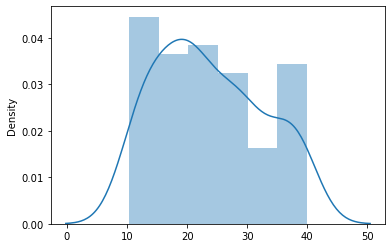

In [3]:
uniform_100 = np.random.uniform(low = 10, high = 40, size = (100))

sns.distplot(uniform_100)

<AxesSubplot:ylabel='Density'>

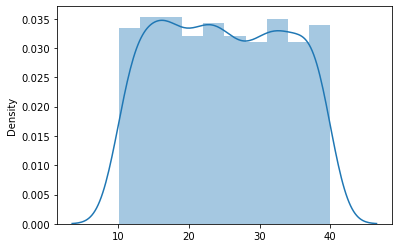

In [6]:
#(previous graph doesnt look like an uniform distribution so we will take more data points this time)
    
uniform_1000 = np.random.uniform(low = 10, high = 40, size = (1000))

sns.distplot(uniform_1000)

<AxesSubplot:ylabel='Density'>

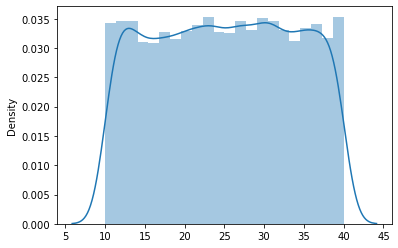

In [5]:
#(in this graph it finally looks like an unifrom distribution) 

uniform_10000 = np.random.uniform(low = 10, high = 40, size = (10000))

sns.distplot(uniform_10000)

In [7]:
# For uniform distribution, parameters are low(alpha), high(betha)
# For normal distribution, parameters are loc() and sclae. loc means the mean and the scale represent standard deviation 

<AxesSubplot:ylabel='Density'>

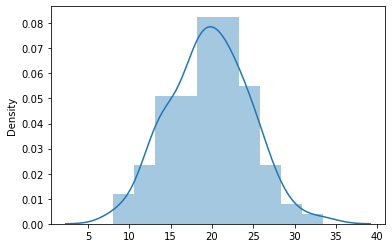

In [8]:
normal_100 = np.random.normal(loc = 20, scale = 5, size=100)

sns.distplot(normal_100)

<AxesSubplot:ylabel='Density'>

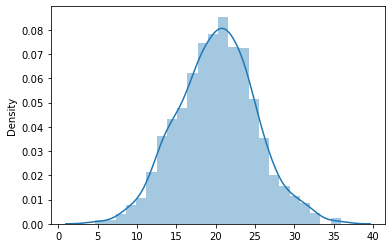

In [9]:
normal_1000 = np.random.normal(loc = 20, scale = 5, size=1000)

sns.distplot(normal_1000)

<AxesSubplot:ylabel='Density'>

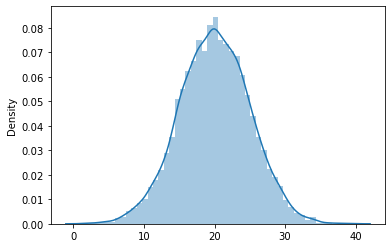

In [10]:
normal_10000 = np.random.normal(loc = 20, scale = 5, size=10000)

sns.distplot(normal_10000)

In [11]:
# we used mean as 20 but since we are using random generator, mean will not going to be exactly 20,
# similary for standard deviation  

#calculating the mean and standard deviation 

mu_normal_10000 = normal_10000.mean()

sigma_normal_10000 = normal_10000.std()

print(mu_normal_10000, sigma_normal_10000)

20.01129914702582 4.977497844296602


In [12]:
#for calculating the point one standard deviation away towards the right 
one_std_right = mu_normal_10000 + (1 * sigma_normal_10000)

#for calculating the point one standard deviation away towards the left
one_std_left = mu_normal_10000 - (1 * sigma_normal_10000)

two_std_right = mu_normal_10000 + (2 * sigma_normal_10000)

two_std_left = mu_normal_10000 - (2 * sigma_normal_10000)

three_std_right = mu_normal_10000 + (3 * sigma_normal_10000)

three_std_left = mu_normal_10000 - (3 * sigma_normal_10000)

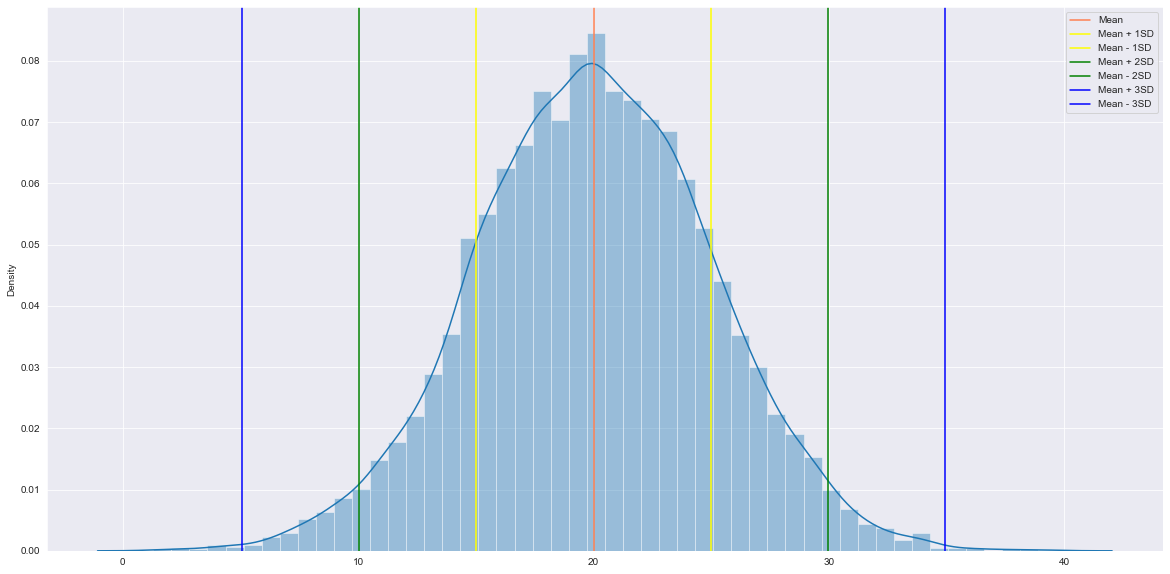

In [13]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
sns.distplot(normal_10000)

plt.axvline(mu_normal_10000, color='coral', label='Mean')

plt.axvline(one_std_right, color='yellow', label='Mean + 1SD')
plt.axvline(one_std_left, color='yellow', label='Mean - 1SD')
plt.axvline(two_std_right, color='green', label='Mean + 2SD')
plt.axvline(two_std_left, color='green', label='Mean - 2SD')
plt.axvline(three_std_right, color='blue', label='Mean + 3SD')
plt.axvline(three_std_left, color='blue', label='Mean - 3SD')
plt.legend();

# 68 - 95 - 99.7 Rule

In [14]:
type(normal_10000)


numpy.ndarray

In [15]:
normal_10000 < one_std_right

array([ True, False,  True, ...,  True, False,  True])

In [16]:
(normal_10000 < one_std_right).sum()

8426

In [17]:
((one_std_left < normal_10000) & (normal_10000 < one_std_right)).sum()

6864

In [18]:
((one_std_left < normal_10000) & (normal_10000 < one_std_right)).sum()/normal_10000.size

0.6864

In [19]:
((two_std_left < normal_10000) & (normal_10000 < two_std_right)).sum()/normal_10000.size

0.9543

In [20]:
((three_std_left < normal_10000) & (normal_10000 < three_std_right)).sum()/normal_10000.size

0.9967

# Checking Skewness and Kurtosis

### Skewness 
In statistics, skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry). The skewness value can be positive or negative, or even undefined. If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data. As a general rule of thumb:
- If skewness is less than -1 or greater than 1, the distribution is highly skewed.
- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
- If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

# Kurtosis

Kurtosis tells you the height and sharpness of the central peak, relative to that of a standard bell curve.



In [30]:
df_100['normal'].skew()

0.07679017127583933

In [31]:
df_100['normal'].kurt()

-0.036042058852328474

In [32]:
print('*'*10, 'SKEWNESS', '*'*10)
print()
print('100 Data Points', df_100['normal'].skew())
print('1000 Data Points', df_1000['normal'].skew())
print('10000 Data Points', df_10000['normal'].skew())
print('*'*30)
print()
print()
print('*'*10, 'KURTOSIS', '*'*10)
print()
print('100 Data Points', df_100['normal'].kurt())
print('1000 Data Points', df_1000['normal'].kurt())
print('10000 Data Points', df_10000['normal'].kurt())
print('*'*30)

********** SKEWNESS **********

100 Data Points 0.07679017127583933
1000 Data Points 0.02591952251061165
10000 Data Points -0.02510293688702991
******************************


********** KURTOSIS **********

100 Data Points -0.036042058852328474
1000 Data Points 0.047069174657761614
10000 Data Points 0.07135006857052373
******************************


# Checking Normality with QQ Plot

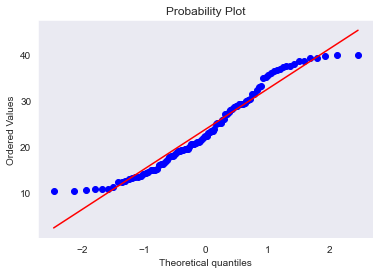

In [33]:
stats.probplot(df_100['uniform'], dist="norm", plot=plt)

plt.grid()

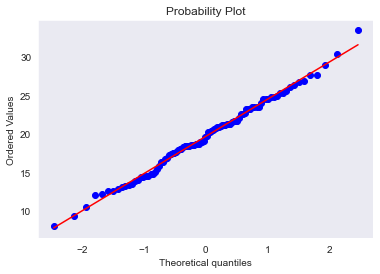

In [34]:
stats.probplot(df_100['normal'], dist="norm", plot=plt)

plt.grid()

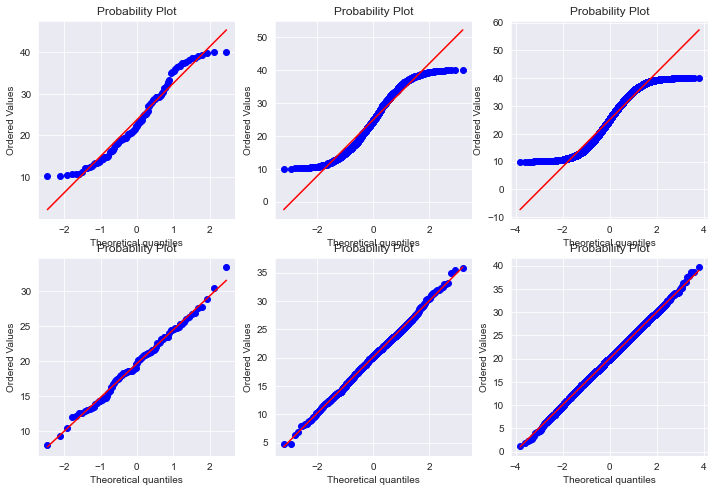

In [35]:
# Initiating a figure
plt.figure(figsize=(12, 8))

# Creating a plot with 1 row and 2 cols

plt.subplot(2, 3, 1)
stats.probplot(df_100['uniform'], dist="norm", plot=plt)

plt.subplot(2, 3, 2)
stats.probplot(df_1000['uniform'], dist="norm", plot=plt)

plt.subplot(2, 3, 3)
stats.probplot(df_10000['uniform'], dist="norm", plot=plt)

plt.subplot(2, 3, 4)
stats.probplot(df_100['normal'], dist="norm", plot=plt)

plt.subplot(2, 3, 5)
stats.probplot(df_1000['normal'], dist="norm", plot=plt)

plt.subplot(2, 3, 6)
stats.probplot(df_10000['normal'], dist="norm", plot=plt)

plt.show()

# Box - Cox Transformation

<AxesSubplot:ylabel='Density'>

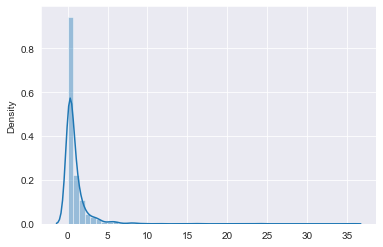

In [36]:
pareto_rv = np.random.pareto(a = 2, size = 1000)

sns.distplot(pareto_rv)

#it is right skewed because of the outliers so we are using median 
#its not a log-normal distribution, its a pareto distribution 

to find whether its a normal distribution or not, we apply PQ plot 

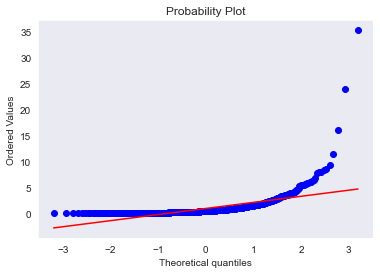

In [37]:
# Normality Test

stats.probplot(pareto_rv, dist="norm", plot=plt)

plt.grid()

In [38]:
# x_t = tranformed by box-cox, l = Lambda

x_t, l = stats.boxcox(pareto_rv)

print(l)

0.10910013133648917


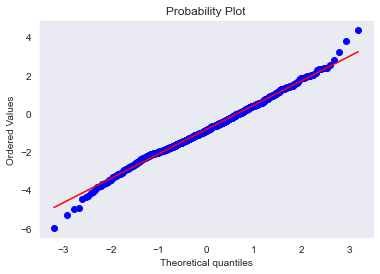

In [39]:
stats.probplot(x_t, dist="norm", plot=plt)

plt.grid()